In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
from matplotlib.patches import Patch
from matplotlib.ticker import ScalarFormatter
import pandas as pd
import seaborn as sns
from functools import reduce
import numpy as np
import pickle

In [ ]:
TOKENS = ['FRAX', 'STASIS', 'GEMINI', 'FEI', 'SUSD', 'BUSD', 'XAUT', 'XCHF']
FIRST_BLOCKS = [11465581,5835474,6622987,9339031,12168368,6302486,8523552,5767935]
DECIMALS = [18,2,2,18,18,18,6,18]
LAST_BLOCK = 14497033
colors = ['#E9B872', '#90A959','#A63D40','#6494AA','#1E5085','#433061','#565656','#151515']

In [ ]:
frax = pd.read_csv('FRAX_token_transfers.csv', parse_dates=['timestamp'])
frax['timestamp'] = pd.to_datetime(frax['timestamp'].dt.date)
v = frax['value'].to_list()
v = [float(int(x) / 10**18) for x in v]
frax['value_float'] = v

gusd = pd.read_csv('GUSD_token_transfers.csv', parse_dates=['timestamp'])
gusd['timestamp'] = pd.to_datetime(gusd['timestamp'].dt.date)
v = gusd['value'].to_list()
v = [float(int(x) / 10**2) for x in v]
gusd['value_float'] = v

fei = pd.read_csv('FEI_token_transfers.csv', parse_dates=['timestamp'])
fei['timestamp'] = pd.to_datetime(fei['timestamp'].dt.date)
v = fei['value'].to_list()
v = [float(int(x) / 10**18) for x in v]
fei['value_float'] = v

eurs = pd.read_csv('EURS_token_transfers.csv', parse_dates=['timestamp'])
eurs['timestamp'] = pd.to_datetime(eurs['timestamp'].dt.date)
v = eurs['value'].to_list()
v = [float(int(x) / 10**2) for x in v]
eurs['value_float'] = v

susd = pd.read_csv('sUSD_token_transfers.csv', parse_dates=['timestamp'])
susd['timestamp'] = pd.to_datetime(susd['timestamp'].dt.date)
v = susd['value'].to_list()
v = [float(int(x) / 10**18) for x in v]
susd['value_float'] = v

busd = pd.read_csv('BUSD_token_transfers.csv', parse_dates=['timestamp'])
busd['timestamp'] = pd.to_datetime(busd['timestamp'].dt.date)
v = busd['value'].to_list()
v = [float(int(x) / 10**18) for x in v]
busd['value_float'] = v

xaut = pd.read_csv('XAUt_token_transfers.csv', parse_dates=['timestamp'])
xaut['timestamp'] = pd.to_datetime(xaut['timestamp'].dt.date)
v = xaut['value'].to_list()
v = [float(int(x) / 10**6) for x in v]
xaut['value_float'] = v

xchf = pd.read_csv('XCHF_token_transfers.csv', parse_dates=['timestamp'])
xchf['timestamp'] = pd.to_datetime(xchf['timestamp'].dt.date)
v = xchf['value'].to_list()
v = [float(int(x) / 10**18) for x in v]
xchf['value_float'] = v

In [ ]:
# calculates the number of 0x0, a=a, and forwarding transactions for each coin
for i in range(len(TOKENS)):
    TOKEN = TOKENS[i]
    DECIMAL = DECIMALS[i|

    df = pd.read_csv('{}_token_transfers.csv'.format(TOKEN))
    v = df['value'].to_list()
    v = [float(int(x) / 10**DECIMAL) for x in v]
    df['value_float'] = v

    zero = df.loc[df.from_address == '0x0000000000000000000000000000000000000000']
    same = df.loc[df.from_address == df.to_address]

    print('% transaction (zero): '+str(round((len(zero)/len(df)*100),2)))
    print('% transaction (zero): '+str(round((zero.value_float.sum() / df.value_float.sum())*100,5)))

    print('% transaction (same): '+str(round((len(same)/len(df)*100),2)))
    print('% transaction (same): '+str(round((same.value_float.sum() / df.value_float.sum())*100,5)))

    ht = pd.read_pickle('{}_holdingTimes.pkl'.format(TOKEN))
    ll = list(ht.values())
    zeroHoldingTime = []
    for l in ll:
        value = l[0]
        holdingTime = l[1]
        for i in range(len(holdingTime)):
            if holdingTime[i] == 0:
                zeroHoldingTime.append(value[i])
                break

    print('% transaction (forwarding): '+str(round((len(zeroHoldingTime)/len(df)*100),2)))
    print('% transaction (forwarding): '+str(round(((sum(zeroHoldingTime) / 10**DECIMAL)/df.value_float.sum())*100,5)))                

In [ ]:
# Number of transactions per week

fraxTrxCount_W = pd.DataFrame(frax[['timestamp','transaction_hash']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).count()).reset_index()
fraxTrxCount_W = fraxTrxCount_W.loc[(fraxTrxCount_W.timestamp >= '2019-01-01') & (fraxTrxCount_W.timestamp < '2022-04-01')]
fraxTrxCount_W = fraxTrxCount_W.rename(columns={'transaction_hash':'frax'})

gusdTrxCount_W = pd.DataFrame(gusd[['timestamp','transaction_hash']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).count()).reset_index()
gusdTrxCount_W = gusdTrxCount_W.loc[(gusdTrxCount_W.timestamp >= '2019-01-01') & (gusdTrxCount_W.timestamp < '2022-04-01')]
gusdTrxCount_W = gusdTrxCount_W.rename(columns={'transaction_hash':'gusd'})

eursTrxCount_W = pd.DataFrame(eurs[['timestamp','transaction_hash']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).count()).reset_index()
eursTrxCount_W = eursTrxCount_W.loc[(eursTrxCount_W.timestamp >= '2019-01-01') & (eursTrxCount_W.timestamp < '2022-04-01')]
eursTrxCount_W = eursTrxCount_W.rename(columns={'transaction_hash':'eurs'})

susdTrxCount_W = pd.DataFrame(susd[['timestamp','transaction_hash']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).count()).reset_index()
susdTrxCount_W = susdTrxCount_W.loc[(susdTrxCount_W.timestamp >= '2019-01-01') & (susdTrxCount_W.timestamp < '2022-04-01')]
susdTrxCount_W = susdTrxCount_W.rename(columns={'transaction_hash':'susd'})

feiTrxCount_W = pd.DataFrame(fei[['timestamp','transaction_hash']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).count()).reset_index()
feiTrxCount_W = feiTrxCount_W.loc[(feiTrxCount_W.timestamp >= '2019-01-01') & (feiTrxCount_W.timestamp < '2022-04-01')]
feiTrxCount_W = feiTrxCount_W.rename(columns={'transaction_hash':'fei'})

busdTrxCount_W = pd.DataFrame(busd[['timestamp','transaction_hash']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).count()).reset_index()
busdTrxCount_W = busdTrxCount_W.loc[(busdTrxCount_W.timestamp >= '2019-01-01') & (busdTrxCount_W.timestamp < '2022-04-01')]
busdTrxCount_W = busdTrxCount_W.rename(columns={'transaction_hash':'busd'})

xautTrxCount_W = pd.DataFrame(xaut[['timestamp','transaction_hash']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).count()).reset_index()
xautTrxCount_W = xautTrxCount_W.loc[(xautTrxCount_W.timestamp >= '2019-01-01') & (xautTrxCount_W.timestamp < '2022-04-01')]
xautTrxCount_W = xautTrxCount_W.rename(columns={'transaction_hash':'xaut'})

xchfTrxCount_W = pd.DataFrame(xchf[['timestamp','transaction_hash']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).count()).reset_index()
xchfTrxCount_W = xchfTrxCount_W.loc[(xchfTrxCount_W.timestamp >= '2019-01-01') & (xchfTrxCount_W.timestamp < '2022-04-01')]
xchfTrxCount_W = xchfTrxCount_W.rename(columns={'transaction_hash':'xchf'})

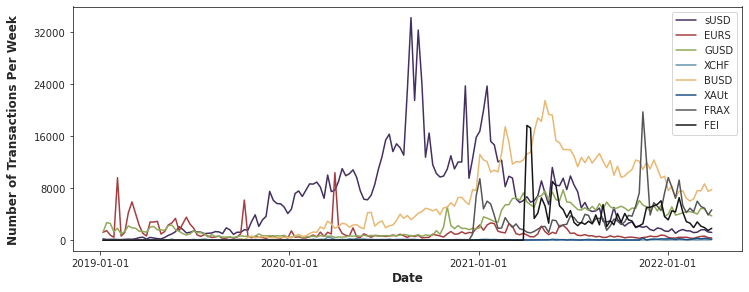

In [666]:
data_frames = [susdTrxCount_W,gusdTrxCount_W,eursTrxCount_W,fraxTrxCount_W,feiTrxCount_W,busdTrxCount_W,xautTrxCount_W,xchfTrxCount_W]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['timestamp'],how='outer'), data_frames).fillna(0)

ax = df_merged.plot(x='timestamp', y=['susd','eurs','gusd','xchf','busd','xaut','frax','fei'],
        kind='line',
        figsize=(12,5),
        color=[colors[5],colors[2],colors[1],colors[3],colors[0],colors[4],colors[6],colors[7]],
        rot=0,
        label=['sUSD','EURS','GUSD','XCHF','BUSD','XAUt','FRAX','FEI'],
        lw=1.5,
        style=['-','-','-','-','-','-','-','-'],
        x_compat=True)     

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.set_major_locator(plt.MaxNLocator(6))
ax.tick_params(axis='y', which='major', left=True)
ax.tick_params(axis='both', which='major', bottom=True, left=True)
ax.set_ylabel('Number of Transactions Per Week', va='center', rotation='vertical', size=12, weight='bold', labelpad=20)
ax.set_xlabel('Date', va='center', size=12, weight='bold', labelpad=10)

for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")
         # ticks along the top edge are off
plt.savefig('image_transactions_per_week.png')
plt.show() 

In [659]:
ts = pd.read_csv('block_timestamps_complete.csv', parse_dates=['timestamp'])
ts2 = pd.DataFrame(ts.loc[(ts.timestamp >= '2019-01-01') & (ts.timestamp < '2022-04-01')])
ts2 = pd.DataFrame(ts2[['timestamp']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).last()).reset_index()

# Volume transferred per day and week

fraxTrxVol_W = pd.DataFrame(frax[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
fraxTrxVol_W['volume_mn'] = fraxTrxVol_W['value_float'] / 10**6
fraxTrxVol_W['volume_bn'] = fraxTrxVol_W['value_float'] / 10**9
fraxTrxVol_W_2 = pd.DataFrame(fraxTrxVol_W[['timestamp','volume_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
fraxTrxVol_W_2 = ts2.merge(fraxTrxVol_W_2, on=['timestamp'], how='left').fillna(0)

gusdTrxVol_W = pd.DataFrame(gusd[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
gusdTrxVol_W['volume_mn'] = gusdTrxVol_W['value_float'] / 10**6
gusdTrxVol_W['volume_bn'] = gusdTrxVol_W['value_float'] / 10**9
gusdTrxVol_W_2 = pd.DataFrame(gusdTrxVol_W[['timestamp','volume_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
gusdTrxVol_W_2 = ts2.merge(gusdTrxVol_W_2, on=['timestamp'], how='left').fillna(0)

susdTrxVol_W = pd.DataFrame(susd[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
susdTrxVol_W['volume_mn'] = susdTrxVol_W['value_float'] / 10**6
susdTrxVol_W['volume_bn'] = susdTrxVol_W['value_float'] / 10**9
susdTrxVol_W_2 = pd.DataFrame(susdTrxVol_W[['timestamp','volume_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
susdTrxVol_W_2 = ts2.merge(susdTrxVol_W_2, on=['timestamp'], how='left').fillna(0)

eursTrxVol_W = pd.DataFrame(eurs[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
eursTrxVol_W['volume_mn'] = eursTrxVol_W['value_float'] / 10**6
eursTrxVol_W['volume_bn'] = eursTrxVol_W['value_float'] / 10**9
eursTrxVol_W_2 = pd.DataFrame(eursTrxVol_W[['timestamp','volume_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
eursTrxVol_W_2 = ts2.merge(eursTrxVol_W_2, on=['timestamp'], how='left').fillna(0)

feiTrxVol_W = pd.DataFrame(fei[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
feiTrxVol_W['volume_mn'] = feiTrxVol_W['value_float'] / 10**6
feiTrxVol_W['volume_bn'] = feiTrxVol_W['value_float'] / 10**9
feiTrxVol_W_2 = pd.DataFrame(feiTrxVol_W[['timestamp','volume_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
feiTrxVol_W_2 = ts2.merge(feiTrxVol_W_2, on=['timestamp'], how='left').fillna(0)

busdTrxVol_W = pd.DataFrame(busd[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
busdTrxVol_W['volume_mn'] = busdTrxVol_W['value_float'] / 10**6
busdTrxVol_W['volume_bn'] = busdTrxVol_W['value_float'] / 10**9
busdTrxVol_W_2 = pd.DataFrame(busdTrxVol_W[['timestamp','volume_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
busdTrxVol_W_2 = ts2.merge(busdTrxVol_W_2, on=['timestamp'], how='left').fillna(0)

xautTrxVol_W = pd.DataFrame(xaut[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
xautTrxVol_W['volume_mn'] = xautTrxVol_W['value_float'] / 10**6
xautTrxVol_W['volume_bn'] = xautTrxVol_W['value_float'] / 10**9
xautTrxVol_W_2 = pd.DataFrame(xautTrxVol_W[['timestamp','volume_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
xautTrxVol_W_2 = ts2.merge(xautTrxVol_W_2, on=['timestamp'], how='left').fillna(0)

xchfTrxVol_W = pd.DataFrame(xchf[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
xchfTrxVol_W['volume_mn'] = xchfTrxVol_W['value_float'] / 10**6
xchfTrxVol_W['volume_bn'] = xchfTrxVol_W['value_float'] / 10**9
xchfTrxVol_W_2 = pd.DataFrame(xchfTrxVol_W[['timestamp','volume_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
xchfTrxVol_W_2 = ts2.merge(xchfTrxVol_W_2, on=['timestamp'], how='left').fillna(0)

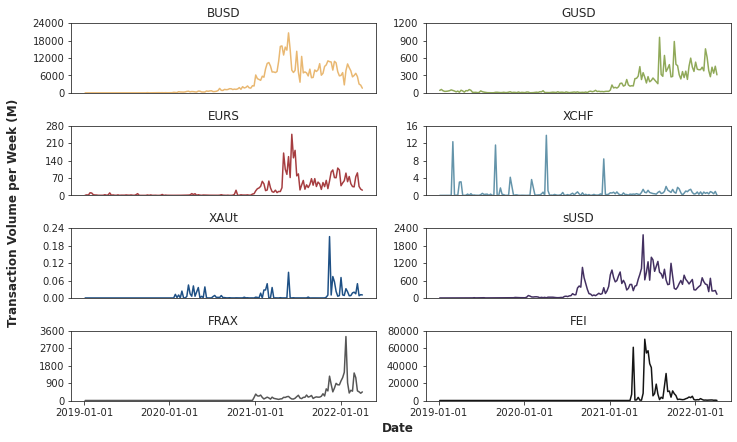

In [667]:
fig, axes = plt.subplots(nrows=4, ncols=2)

b = busdTrxVol_W_2.plot(x='timestamp', y='volume_mn',
        ax=axes[0,0],    
        kind='line',
        figsize=(10,6),
        color=colors[0],
        rot=0,
        lw=1.5,                
        x_compat=True,
        sharex=True,
        legend=False)

b.set_title('BUSD') 
b.set_xlabel('')
b.set_ylim(0, 24000)
b.yaxis.set_ticks([0,6000,12000,18000,24000])
b.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
b.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
b.tick_params(axis='y', which='major', left=True)

g = gusdTrxVol_W_2.plot(x='timestamp', y='volume_mn',
        ax=axes[0,1],    
        kind='line',
        figsize=(10,6),
        color=colors[1],
        rot=0,
        lw=1.5,                
        x_compat=True,
        sharex=True,
        legend=False) 

g.set_title('GUSD') 
g.set_xlabel('')
g.set_ylim(0, 1200)
g.yaxis.set_ticks([0,300,600,900,1200])
g.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
g.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
g.tick_params(axis='y', which='major', left=True)

s = eursTrxVol_W_2.plot(x='timestamp', y='volume_mn',
        ax=axes[1,0],    
        kind='line',
        figsize=(10,6),
        color=colors[2],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False)

s.set_title('EURS')
s.set_xlabel('')
s.set_ylim(0, 280)
s.yaxis.set_ticks([0,70,140,210,280])
s.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
s.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
s.tick_params(axis='y', which='major', left=True)

xc = xchfTrxVol_W_2.plot(x='timestamp', y='volume_mn',
        ax=axes[1,1],    
        kind='line',
        figsize=(10,6),
        color=colors[3],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False)

xc.set_title('XCHF')
xc.set_xlabel('')
xc.set_ylim(0, 16)
xc.yaxis.set_ticks([0,4,8,12,16])
xc.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
xc.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
xc.tick_params(axis='y', which='major', left=True)

xa = xautTrxVol_W_2.plot(x='timestamp', y='volume_mn',
        ax=axes[2,0],    
        kind='line',
        figsize=(10,6),
        color=colors[4],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False)

xa.set_title('XAUt')
xa.set_xlabel('')
xa.set_ylim(0, 0.24)
xa.yaxis.set_ticks([0,0.06,0.12,0.18,0.24])
xa.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
xa.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
xa.tick_params(axis='y', which='major', left=True)

su = susdTrxVol_W_2.plot(x='timestamp', y='volume_mn',
        ax=axes[2,1],    
        kind='line',
        figsize=(10,6),
        color=colors[5],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False)

su.set_title('sUSD')
su.set_xlabel('')
su.set_ylim(0, 2400)
su.yaxis.set_ticks([0,600,1200,1800,2400])
su.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
su.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
su.tick_params(axis='y', which='major', left=True)

f = fraxTrxVol_W_2.plot(x='timestamp', y='volume_mn',
        ax=axes[3,0],    
        kind='line',
        figsize=(10,6),
        color=colors[6],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False)

f.set_title('FRAX')  
f.set_xlabel('')
f.set_ylim(0, 3600)
f.yaxis.set_ticks([0,900,1800,2700,3600])
f.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
f.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
f.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in f.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center") 

fe = feiTrxVol_W_2.plot(x='timestamp', y='volume_mn',
        ax=axes[3,1],    
        kind='line',
        figsize=(10,6),
        color=colors[7],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False)

fe.set_title('FEI') 
fe.set_xlabel('')
fe.set_ylim(0, 80000)
fe.yaxis.set_ticks([0,20000,40000,60000,80000])
fe.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
fe.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fe.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in fe.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center") 

fig.tight_layout()
fig.text(-0.02, 0.5, 'Transaction Volume per Week (M)', va='center', rotation='vertical', size=12, weight='bold')
fig.text(0.5, 0, 'Date', va='center', size=12, weight='bold')
plt.savefig('image_transaction_volume_per_week.png', bbox_inches='tight')
plt.show()                     

In [636]:
ts = pd.read_csv('block_timestamps_complete.csv', parse_dates=['timestamp'])
ts2 = pd.DataFrame(ts.loc[(ts.timestamp >= '2019-01-01') & (ts.timestamp < '2022-04-01')])
ts2 = pd.DataFrame(ts2[['timestamp']].groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).last()).reset_index()

fraxSupply = pd.read_csv('FRAX_supply_for_plot.csv', parse_dates=['timestamp'])
fraxSupply_D = pd.DataFrame(fraxSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).mean()).reset_index()
fraxSupply_D = ts2.merge(fraxSupply_D, on=['timestamp'], how='left').fillna(0)

busdSupply = pd.read_csv('BUSD_supply_for_plot.csv', parse_dates=['timestamp'])
busdSupply_D = pd.DataFrame(busdSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).mean()).reset_index()
busdSupply_D = ts2.merge(busdSupply_D, on=['timestamp'], how='left').fillna(0)

feiSupply = pd.read_csv('FEI_supply_for_plot.csv', parse_dates=['timestamp'])
feiSupply_D = pd.DataFrame(feiSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).mean()).reset_index()
feiSupply_D = ts2.merge(feiSupply_D, on=['timestamp'], how='left').fillna(0)

susdSupply = pd.read_csv('sUSD_supply_for_plot.csv', parse_dates=['timestamp'])
susdSupply_D = pd.DataFrame(susdSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).mean()).reset_index()
susdSupply_D = ts2.merge(susdSupply_D, on=['timestamp'], how='left').fillna(0)

eursSupply = pd.read_csv('EURS_supply_for_plot.csv', parse_dates=['timestamp'])
eursSupply_D = pd.DataFrame(eursSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).mean()).reset_index()
eursSupply_D = ts2.merge(eursSupply_D, on=['timestamp'], how='left').fillna(0)

gusdSupply = pd.read_csv('GUSD_supply_for_plot.csv', parse_dates=['timestamp'])
gusdSupply_D = pd.DataFrame(gusdSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).mean()).reset_index()
gusdSupply_D = ts2.merge(gusdSupply_D, on=['timestamp'], how='left').fillna(0)

xchfSupply = pd.read_csv('XCHF_supply_for_plot.csv', parse_dates=['timestamp'])
xchfSupply_D = pd.DataFrame(xchfSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).mean()).reset_index()
xchfSupply_D = ts2.merge(xchfSupply_D, on=['timestamp'], how='left').fillna(0)

xautSupply = pd.read_csv('XAUt_supply_for_plot.csv', parse_dates=['timestamp'])
xautSupply_D = pd.DataFrame(xautSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).mean()).reset_index()
xautSupply_D = ts2.merge(xautSupply_D, on=['timestamp'], how='left').fillna(0)

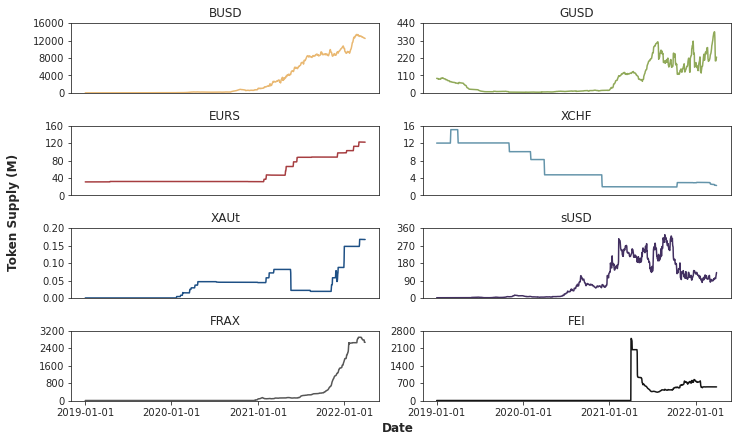

In [668]:
fig, axes = plt.subplots(nrows=4, ncols=2)

b = busdSupply_D.plot(x='timestamp', y='supply_mn',
        ax=axes[0,0],    
        kind='line',
        figsize=(10,6),
        color=colors[0],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False)

b.set_title('BUSD')  
b.set_xlabel('')
b.set_ylim(0, 16000)
b.yaxis.set_ticks([0,4000,8000,12000,16000])
b.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
b.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
b.tick_params(axis='y', which='major', left=True)
b.tick_params(axis='y', which='minor', bottom=False, left=False)

g = gusdSupply_D.plot(x='timestamp', y='supply_mn',
        ax=axes[0,1],    
        kind='line',
        figsize=(10,6),
        color=colors[1],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False) 

g.set_title('GUSD') 
g.set_xlabel('')
g.set_ylim(0, 440)
g.yaxis.set_ticks([0,110,220,330,440])
g.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
g.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  
g.tick_params(axis='y', which='major', left=True)
g.tick_params(axis='y', which='minor', bottom=False, left=False)

e = eursSupply_D.plot(x='timestamp', y='supply_mn',
        ax=axes[1,0],    
        kind='line',
        figsize=(10,6),
        color=colors[2],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False)

e.set_title('EURS')  
e.set_xlabel('')
e.set_ylim(0, 160)
e.yaxis.set_ticks([0,40,80,120,160])
e.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
e.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
e.tick_params(axis='y', which='major', left=True)
e.tick_params(axis='y', which='minor', bottom=False, left=False)

xc = xchfSupply_D.plot(x='timestamp', y='supply_mn',
        ax=axes[1,1],    
        kind='line',
        figsize=(10,6),
        color=colors[3],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False)

xc.set_title('XCHF')  
xc.set_xlabel('')
xc.set_ylim(0, 16)
xc.yaxis.set_ticks([0,4,8,12,16])
xc.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
xc.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
xc.tick_params(axis='y', which='major', left=True)
xc.tick_params(axis='y', which='minor', bottom=False, left=False)

xa = xautSupply_D.plot(x='timestamp', y='supply_mn',
        ax=axes[2,0],    
        kind='line',
        figsize=(10,6),
        color=colors[4],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False)

xa.set_title('XAUt') 
xa.set_xlabel('')
xa.set_ylim(0, 0.20)
xa.yaxis.set_ticks([0.00,0.05,0.10,0.15,0.20])
xa.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
xa.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
xa.tick_params(axis='y', which='minor', bottom=False, left=False)
xa.tick_params(axis='y', which='major', left=True)

su = susdSupply_D.plot(x='timestamp', y='supply_mn',
        ax=axes[2,1],    
        kind='line',
        figsize=(10,6),
        color=colors[5],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False)

su.set_title('sUSD') 
su.set_xlabel('')
su.set_ylim(0, 360)
su.yaxis.set_ticks([0,90,180,270,360])
su.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
su.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
su.tick_params(axis='y', which='major', left=True)
su.tick_params(axis='y', which='minor', bottom=False, left=False)

f = fraxSupply_D.plot(x='timestamp', y='supply_mn',
        ax=axes[3,0],    
        kind='line',
        figsize=(10,6),
        color=colors[6],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False)

f.set_title('FRAX') 
f.set_xlabel('')
f.set_ylim(0, 3200)
f.yaxis.set_ticks([0,800,1600,2400,3200])
f.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
f.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
f.tick_params(axis='both', which='minor', bottom=False, left=False)
f.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in f.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")

fe = feiSupply_D.plot(x='timestamp', y='supply_mn',
        ax=axes[3,1],    
        kind='line',
        figsize=(10,6),
        color=colors[7],
        rot=0,
        lw=1.5,
        x_compat=True,
        sharex=True,
        legend=False) 

fe.set_title('FEI') 
fe.set_xlabel('')
fe.set_ylim(0, 2800)
fe.yaxis.set_ticks([0,700,1400,2100,2800])
fe.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
fe.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
fe.tick_params(axis='both', which='major', bottom=True, left=True)
fe.tick_params(axis='both', which='minor', bottom=False, left=False)
for tick in fe.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")  

fig.tight_layout()
# fig.text(0.5,1,'Token Supply', ha='center', size='16', weight='bold')
fig.text(-0.02, 0.5, 'Token Supply (M)', va='center', rotation='vertical', size=12, weight='bold')
fig.text(0.5, 0, 'Date', va='center', size=12, weight='bold')
plt.savefig('image_supply.png', bbox_inches='tight')
plt.show()                     

In [ ]:
for i in range(len(TOKENS)):
    TOKEN = TOKENS[i]
    FIRST_BLOCK = FIRST_BLOCKS[i]
    dct = pd.read_pickle('{}_microVelocities_mean.pkl'.format(TOKEN))
    df = pd.DataFrame.from_dict(dct)
    ts = pd.read_csv('block_timestamps_complete.csv', parse_dates=['timestamp'])
    ts = ts.loc[(ts.block_number >= FIRST_BLOCK) & (ts.block_number <= LAST_BLOCK)]
    ts = ts[['timestamp']].groupby(pd.Grouper(key='timestamp', axis=0, freq='D')).last().reset_index()
    timestamps = ts['timestamp'].to_list()
    df['total'] = df.sum(axis=1)
    df['timestamp'] = timestamps
    df = df.groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean().reset_index()
    df.to_csv('{}_microVelocities_weekly_avg.csv'.format(TOKEN), index=False)

In [ ]:
fraxSupply_W = pd.DataFrame(fraxSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
fraxTrxVol_W = pd.DataFrame(frax[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
fraxTrxVol_W['volume_mn'] = fraxTrxVol_W['value_float'] / 10**6
fraxMicroVelocity_W = pd.read_csv('FRAX_microVelocities_weekly_avg.csv', parse_dates=['timestamp'])
fraxMicroVelocity_W = fraxMicroVelocity_W[['timestamp','total']]
fraxMicroVelocity_W['total'] = fraxMicroVelocity_W['total']*52

fraxVelocity = fraxTrxVol_W.merge(fraxSupply_W, on=['timestamp'])
fraxVelocity = fraxVelocity.merge(fraxMicroVelocity_W, on=['timestamp'])
fraxVelocity['velocity'] = (fraxVelocity.volume_mn)/7 / fraxVelocity.supply_mn * 52

fraxVelocity = fraxVelocity.loc[(fraxVelocity.timestamp >= '2019-01-06') & (fraxVelocity.timestamp <= '2022-03-27')]
fraxVelocity

In [ ]:
eursSupply_W = pd.DataFrame(eursSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
eursTrxVol_W = pd.DataFrame(eurs[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
eursTrxVol_W['volume_mn'] = eursTrxVol_W['value_float'] / 10**6
eursMicroVelocity_W = pd.read_csv('EURS_microVelocities_weekly_avg.csv', parse_dates=['timestamp'])
eursMicroVelocity_W = eursMicroVelocity_W[['timestamp','total']]
eursMicroVelocity_W['total'] = eursMicroVelocity_W['total']*52

eursVelocity = eursTrxVol_W.merge(eursSupply_W, on=['timestamp'])
eursVelocity = eursVelocity.merge(eursMicroVelocity_W, on=['timestamp'])
eursVelocity['velocity'] = (eursVelocity.volume_mn)/7 / eursVelocity.supply_mn * 52
eursVelocity = eursVelocity
eursVelocity = eursVelocity.loc[(eursVelocity.timestamp >= '2019-01-06') & (eursVelocity.timestamp <= '2022-03-27')]

In [ ]:
gusdSupply_W = pd.DataFrame(gusdSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
gusdTrxVol_W = pd.DataFrame(gusd[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
gusdTrxVol_W['volume_mn'] = gusdTrxVol_W['value_float'] / 10**6
gusdMicroVelocity_W = pd.read_csv('GUSD_microVelocities_weekly_avg.csv', parse_dates=['timestamp'])
gusdMicroVelocity_W = gusdMicroVelocity_W[['timestamp','total']]
gusdMicroVelocity_W['total'] = gusdMicroVelocity_W['total']*52

gusdVelocity = gusdTrxVol_W.merge(gusdSupply_W, on=['timestamp'])
gusdVelocity = gusdVelocity.merge(gusdMicroVelocity_W, on=['timestamp'])
gusdVelocity['velocity'] = (gusdVelocity.volume_mn)/7 / gusdVelocity.supply_mn * 52
gusdVelocity = gusdVelocity
gusdVelocity = gusdVelocity.loc[(gusdVelocity.timestamp >= '2019-01-06') & (gusdVelocity.timestamp <= '2022-03-27')]

In [ ]:
xchfSupply_W = pd.DataFrame(xchfSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
xchfTrxVol_W = pd.DataFrame(xchf[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
xchfTrxVol_W['volume_mn'] = xchfTrxVol_W['value_float'] / 10**6
xchfMicroVelocity_W = pd.read_csv('XCHF_microVelocities_weekly_avg.csv', parse_dates=['timestamp'])
xchfMicroVelocity_W = xchfMicroVelocity_W[['timestamp','total']]
xchfMicroVelocity_W['total'] = xchfMicroVelocity_W['total']*52

xchfVelocity = xchfTrxVol_W.merge(xchfSupply_W, on=['timestamp'])
xchfVelocity = xchfVelocity.merge(xchfMicroVelocity_W, on=['timestamp'])
xchfVelocity['velocity'] = (xchfVelocity.volume_mn)/7 / xchfVelocity.supply_mn * 52
xchfVelocity = xchfVelocity
xchfVelocity = xchfVelocity.loc[(xchfVelocity.timestamp >= '2019-01-06') & (xchfVelocity.timestamp <= '2022-03-27')]

In [ ]:
xautSupply_W = pd.DataFrame(xautSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
xautTrxVol_W = pd.DataFrame(xaut[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
xautTrxVol_W['volume_mn'] = xautTrxVol_W['value_float'] / 10**6
xautMicroVelocity_W = pd.read_csv('XAUt_microVelocities_weekly_avg.csv', parse_dates=['timestamp'])
xautMicroVelocity_W = xautMicroVelocity_W[['timestamp','total']]
xautMicroVelocity_W['total'] = xautMicroVelocity_W['total']*52

xautVelocity = xautTrxVol_W.merge(xautSupply_W, on=['timestamp'])
xautVelocity = xautVelocity.merge(xautMicroVelocity_W, on=['timestamp'])
xautVelocity['velocity'] = (xautVelocity.volume_mn)/7 / xautVelocity.supply_mn * 52
xautVelocity = xautVelocity
xautVelocity = xautVelocity.loc[(xautVelocity.timestamp >= '2019-01-06') & (xaut.timestamp <= '2022-03-27')]

In [ ]:
feiSupply_W = pd.DataFrame(feiSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
feiTrxVol_W = pd.DataFrame(fei[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
feiTrxVol_W['volume_mn'] = feiTrxVol_W['value_float'] / 10**6
feiMicroVelocity_W = pd.read_csv('FEI_microVelocities_weekly_avg.csv', parse_dates=['timestamp'])
feiMicroVelocity_W = feiMicroVelocity_W[['timestamp','total']]
feiMicroVelocity_W['total'] = feiMicroVelocity_W['total']*52

feiVelocity = feiTrxVol_W.merge(feiSupply_W, on=['timestamp'])
feiVelocity = feiVelocity.merge(feiMicroVelocity_W, on=['timestamp'])
feiVelocity['velocity'] = (feiVelocity.volume_mn)/7 / feiVelocity.supply_mn * 52
feiVelocity = feiVelocity
feiVelocity = feiVelocity.loc[(feiVelocity.timestamp >= '2019-01-06') & (feiVelocity.timestamp <= '2022-03-27')]

In [ ]:
busdSupply_W = pd.DataFrame(busdSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
busdTrxVol_W = pd.DataFrame(busd[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
busdTrxVol_W['volume_mn'] = busdTrxVol_W['value_float'] / 10**6
busdMicroVelocity_W = pd.read_csv('BUSD_microVelocities_weekly_avg.csv', parse_dates=['timestamp'])
busdMicroVelocity_W = busdMicroVelocity_W[['timestamp','total']]
busdMicroVelocity_W['total'] = busdMicroVelocity_W['total']*52

busdVelocity = busdTrxVol_W.merge(busdSupply_W, on=['timestamp'])
busdVelocity = busdVelocity.merge(busdMicroVelocity_W, on=['timestamp'])
busdVelocity['velocity'] = (busdVelocity.volume_mn)/7 / busdVelocity.supply_mn * 52
busdVelocity = busdVelocity
busdVelocity = busdVelocity.loc[(busdVelocity.timestamp >= '2019-01-06') & (busdVelocity.timestamp <= '2022-03-27')]

In [ ]:
susdSupply_W = pd.DataFrame(susdSupply[['timestamp','supply_mn']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()
susdTrxVol_W = pd.DataFrame(susd[['timestamp','value_float']].groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).sum()).reset_index()
susdTrxVol_W['volume_mn'] = susdTrxVol_W['value_float'] / 10**6
susdMicroVelocity_W = pd.read_csv('sUSD_microVelocities_weekly_avg.csv', parse_dates=['timestamp'])
susdMicroVelocity_W = susdMicroVelocity_W[['timestamp','total']]
susdMicroVelocity_W['total'] = susdMicroVelocity_W['total']*52

susdVelocity = susdTrxVol_W.merge(susdSupply_W, on=['timestamp'])
susdVelocity = susdVelocity.merge(susdMicroVelocity_W, on=['timestamp'])
susdVelocity['velocity'] = (susdVelocity.volume_mn)/7 / susdVelocity.supply_mn * 52
susdVelocity = susdVelocity
susdVelocity = susdVelocity.loc[(susdVelocity.timestamp >= '2019-01-06') & (susdVelocity.timestamp <= '2022-03-27')]

In [ ]:
feiVelocity[['velocity','total']].describe()

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2)

b = busdVelocity.plot(x='timestamp', y=['velocity', 'total'],
        ax=axes[0,0],    
        kind='line',
        figsize=(10,6),
        color=[colors[2],colors[3]],
        rot=0,
        x_compat=True,
        legend=False) 

b.set_title('BUSD')
b.set_xlabel('')
b.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
b.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
b.yaxis.set_major_locator(plt.MaxNLocator(5))
b.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in b.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center") 

g = gusdVelocity.plot(x='timestamp', y=['velocity','total'],
        ax=axes[0,1],    
        kind='line',
        figsize=(10,6),
        color=[colors[2],colors[3]],
        rot=0,
        x_compat=True,
        legend=False) 

g.set_title('GUSD')
g.set_xlabel('')
g.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
g.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
g.yaxis.set_major_locator(plt.MaxNLocator(5))
g.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in g.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")

s = eursVelocity.plot(x='timestamp', y=['velocity','total'],
        ax=axes[1,0],    
        kind='line',
        figsize=(10,6),
        color=[colors[2],colors[3]],
        rot=0,
        x_compat=True,
        legend=False)

s.set_title('EURS')
s.set_xlabel('')
s.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
s.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
s.yaxis.set_major_locator(plt.MaxNLocator(5))
s.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in s.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")

xc = xchfVelocity.plot(x='timestamp', y=['velocity','total'],
        ax=axes[1,1],    
        kind='line',
        figsize=(10,6),
        color=[colors[2],colors[3]],
        rot=0,
        x_compat=True,
        legend=False)

xc.set_title('XCHF')
xc.set_xlabel('')
xc.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
xc.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
xc.yaxis.set_major_locator(plt.MaxNLocator(5))
xc.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in xc.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")

xa = xautVelocity.plot(x='timestamp', y=['velocity','total'],
        ax=axes[2,0],    
        kind='line',
        figsize=(10,6),
        color=[colors[2],colors[3]],
        rot=0,
        x_compat=True,
        legend=False)

xa.set_title('XAUt')
xa.set_xlabel('')
xa.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
xa.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
xa.yaxis.set_major_locator(plt.MaxNLocator(5))
xa.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in xa.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")

su = susdVelocity.plot(x='timestamp', y=['velocity','total'],
        ax=axes[2,1],    
        kind='line',
        figsize=(10,6),
        color=[colors[2],colors[3]],
        rot=0,
        x_compat=True,
        legend=False)

su.set_title('sUSD')
su.set_xlabel('')
su.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
su.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
su.yaxis.set_major_locator(plt.MaxNLocator(5))
su.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in su.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")

f = fraxVelocity.plot(x='timestamp', y=['velocity','total'],
        ax=axes[3,0],    
        kind='line',
        figsize=(10,6),
        color=[colors[2],colors[3]],
        rot=0,
        x_compat=True,
        legend=False)

f.set_title('FRAX')  
f.set_xlabel('')
f.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,6)))
f.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
f.yaxis.set_major_locator(plt.MaxNLocator(5))
f.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in f.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")

fe = feiVelocity.plot(x='timestamp', y=['velocity','total'],
        ax=axes[3,1],    
        kind='line',
        figsize=(10,6),
        color=[colors[2],colors[3]],
        rot=0,
        x_compat=True)

fe.legend([r'$PQ/M$', r'$\sum_{}\ _i V_i$'],loc='upper right')
fe.set_title('FEI')  
fe.set_xlabel('')
fe.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,6)))
fe.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fe.yaxis.set_major_locator(plt.MaxNLocator(5))
fe.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in fe.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")
    
fig.tight_layout()
fig.text(-0.02, 0.5, 'Velocity', va='center', rotation='vertical', size=12, weight='bold')
fig.text(0.5, 0, 'Date', va='center', size=12, weight='bold')
plt.savefig('image_velocity_over_time.png',bbox_inches='tight')
plt.show()                     

In [ ]:
plt.rcParams['mathtext.fontset'] = 'stix'
fig, axes = plt.subplots(nrows=4, ncols=2)

b = sns.regplot(x = "velocity", y = "total",
        ax=axes[0,0], 
        ci = None,
        fit_reg = False,
        color=colors[0],
        scatter_kws={'alpha': 0.6},
        data = busdVelocity)

b.set_title('BUSD')
b.set_xlabel('')
b.set_ylabel('')
b.axline([0, 0], [1, 1], c='darkorange', lw=2.5, ls='--')
b.loglog()
b.set_xticks([1, 2, 5, 20, 80])
b.set_yticks([1, 5, 20, 80])
b.tick_params(axis='both', which='major', bottom=True, left=True)
for axis in [b.xaxis, b.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

g = sns.regplot(x = "velocity", y = "total", 
        ax=axes[0,1],
        ci = None,
        fit_reg = False,
        color=colors[1],
        scatter_kws={'alpha': 0.6},
        data = gusdVelocity)

g.set_title('GUSD')
g.set_xlabel('')
g.set_ylabel('')
g.axline([0, 0], [1, 1], c='darkorange', lw=2.5, ls='--')
g.loglog()
g.set_xticks([1, 2, 5, 20, 80])
g.set_yticks([1, 5, 20, 80])
g.tick_params(axis='both', which='major', bottom=True, left=True)
for axis in [g.xaxis, g.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

s = sns.regplot(x = "velocity", y = "total",
        ax=axes[1,0], 
        ci = None,
        fit_reg = False,
        color=colors[2],
        scatter_kws={'alpha': 0.6},
        data = eursVelocity)
s.set_title('EURS') 
s.set_xlabel('')
s.set_ylabel('')
s.axline([0, 0], [1, 1], c='darkorange', lw=2.5, ls='--')
s.loglog()
s.set_xticks([0.02, 0.05, 0.2, 1, 6, 30])
s.set_yticks([0.1, 1, 6, 30])
s.tick_params(axis='both', which='major', bottom=True, left=True)
for axis in [s.xaxis, s.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

xc = sns.regplot(x = "velocity", y = "total", 
        ax=axes[1,1],
        ci = None,
        fit_reg = False,         
        color=colors[3],
        scatter_kws={'alpha': 0.6},
        data = xchfVelocity)

xc.set_title('XCHF')
xc.set_xlabel('')
xc.set_ylabel('')
xc.axline([0, 0], [1, 1], c='darkorange', lw=2.5, ls='--')
xc.loglog()
xc.set_xticks([0.01, 0.05, 0.8, 20])
xc.set_yticks([0.1, 0.8, 5, 20])
xc.tick_params(axis='both', which='major', bottom=True, left=True)
for axis in [xc.xaxis, xc.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

xa = sns.regplot(x = "velocity", y = "total", 
        ax=axes[2,0],
        ci = None,
        fit_reg = False,         
        color=colors[4],
        scatter_kws={'alpha': 0.6},
        data = xautVelocity)

xa.set_title('XAUt')
xa.set_xlabel('')
xa.set_ylabel('')
xa.axline([0, 0], [1, 1], c='darkorange', lw=2.5, ls='--')
xa.loglog()
xa.set_xticks([0.01, 0.1, 2, 50])
xa.set_yticks([0.1, 2, 50])
xa.tick_params(axis='both', which='major', bottom=True, left=True)
for axis in [xa.xaxis, xa.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

su = sns.regplot(x = "velocity", y = "total", 
        ax=axes[2,1],
        ci = None,
        fit_reg = False,
        color=colors[5],
        scatter_kws={'alpha': 0.6},
        data = susdVelocity)

su.set_title('sUSD')  
su.set_xlabel('')
su.set_ylabel('')
su.axline([0, 0], [1, 1], c='darkorange', lw=2.5, ls='--')
su.loglog()
su.set_xticks([0.02, 0.06, 0.2, 1, 10, 100])
su.set_yticks([0.1, 1, 10, 100])
su.tick_params(axis='both', which='major', bottom=True, left=True)
for axis in [su.xaxis, su.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

f = sns.regplot(x = "velocity", y = "total", 
        ax=axes[3,0],
        ci = None,
        fit_reg = False,
        color=colors[6],
        scatter_kws={'alpha': 0.6},
        data = fraxVelocity)

f.set_title('FRAX') 
f.set_xlabel('')
f.set_ylabel('')
f.axline([0, 0], [1, 1], c='darkorange', lw=2.5, ls='--')
f.loglog()
f.set_xticks([0.5, 1, 2.5, 8, 30, 100])
f.set_yticks([0.5, 2.5, 30, 1000])
f.tick_params(axis='both', which='major', bottom=True, left=True)
for axis in [f.xaxis, f.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

fe = sns.regplot(x = "velocity", y = "total", 
        ax=axes[3,1],
        ci = None,
        fit_reg = False,
        color=colors[7],
        scatter_kws={'alpha': 0.6},
        data = feiVelocity)

fe.set_title('FEI') 
fe.set_xlabel('')
fe.set_ylabel('')
fe.axline([0, 0], [1, 1], c='darkorange', lw=2.5, ls='--')
fe.loglog()
fe.set_xticks([1, 2, 5, 20, 100, 1000])
fe.set_yticks([1, 5, 30, 300])
fe.tick_params(axis='both', which='major', bottom=True, left=True)
for axis in [fe.xaxis, fe.yaxis]:
    axis.set_major_formatter(ScalarFormatter())

fig.set_size_inches(10,7.5)
fig.text(0.5, 0, r'$PQ\,/\,M$', ha='center', size=16, weight='bold')
fig.text(-0.01, 0.5, r'$\sum_{}\ _i V_i$', va='center', rotation='vertical', size=16, weight='bold')
plt.subplots_adjust(left=0.07,
                    bottom=0.07, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.5)
plt.savefig('image_goodness_of_calculation.png',bbox_inches='tight')
plt.show()                     

In [ ]:
busdVelocity['velocity'].corr(busdVelocity['total'],method='spearman')

In [ ]:
xautVelocity['velocity'].corr(xautVelocity['total'],method='spearman')

In [ ]:
xchfVelocity['velocity'].corr(xchfVelocity['total'],method='spearman')

In [ ]:
gusdVelocity['velocity'].corr(gusdVelocity['total'],method='spearman')

In [ ]:
eursVelocity['velocity'].corr(eursVelocity['total'])

In [ ]:
fraxVelocity['velocity'].corr(fraxVelocity['total'],method='spearman')

In [ ]:
feiVelocity['velocity'].corr(feiVelocity['total'],method='pearson')

In [ ]:
susdVelocity['velocity'].corr(susdVelocity['total'],method='spearman')

In [ ]:
# calculates the top 5 addresses per week in percentages
for TOKEN in TOKENS:
    top5 = pd.read_csv('{}_microVelocities_weekly.csv'.format(TOKEN), parse_dates=['timestamp'])
    top5 = top5.loc[top5.timestamp >= '2019-01-01']
    timestamp = top5.timestamp.to_list()
    total = top5.total.to_list()
    top5 = top5.drop(['timestamp','total'], axis = 1)

    top_n = 5
    top5Add = pd.DataFrame({n: top5.T[col].nlargest(top_n).index.tolist() for n, col in enumerate(top5.T)}).T
    top5Add['timestamp'] = timestamp

    top5Val = pd.DataFrame({n: top5.T[col].nlargest(top_n).tolist() for n, col in enumerate(top5.T)}).T
    top5Val['rest'] = round(total - (top5Val[0] + top5Val[1] + top5Val[2] + top5Val[3] + top5Val[4]),8)
    func = lambda x: np.asarray(x) / np.asarray(total)
    percentage = round(top5Val.apply(func),8)
    percentage['timestamp'] = timestamp

    percentage.to_csv('{}_top5_percentages.csv'.format(TOKEN), index=False)

    numOfDates = len(top5Add.timestamp.to_list())

    df1 = top5Add[['timestamp',0]].groupby(0).count().reset_index()
    df1 = df1.rename(columns={0:'address','timestamp':'present1'})
    df1 = df1.sort_values(by=['present1'], ascending=False)

    df2 = top5Add[['timestamp',1]].groupby(1).count().reset_index()
    df2 = df2.rename(columns={1:'address','timestamp':'present2'})
    df2 = df2.sort_values(by=['present2'], ascending=False)

    df3 = top5Add[['timestamp',2]].groupby(2).count().reset_index()
    df3 = df3.rename(columns={2:'address','timestamp':'present3'})
    df3 = df3.sort_values(by=['present3'], ascending=False)

    df4 = top5Add[['timestamp',3]].groupby(3).count().reset_index()
    df4 = df4.rename(columns={3:'address','timestamp':'present4'})
    df4 = df4.sort_values(by=['present4'], ascending=False)

    df5 = top5Add[['timestamp',4]].groupby(4).count().reset_index()
    df5 = df5.rename(columns={4:'address','timestamp':'present5'})
    df5 = df5.sort_values(by=['present5'], ascending=False)

    df1 = df1.merge(df2, on='address', how='outer')
    df1 = df1.merge(df3, on='address', how='outer')
    df1 = df1.merge(df4, on='address', how='outer')
    df1 = df1.merge(df5, on='address', how='outer').fillna(0)

    df1['total'] = df1['present1'] + df1['present2'] + df1['present3'] + df1['present4'] + df1['present5']

    df1 = df1.sort_values(by=['total'], ascending=False)

    df1 = df1[0:5][['address','present1','present2','present3','present4','present5']]

    df1['present1'] = df1['present1'] / numOfDates
    df1['present2'] = df1['present2'] / numOfDates
    df1['present3'] = df1['present3'] / numOfDates
    df1['present4'] = df1['present4'] / numOfDates
    df1['present5'] = df1['present5'] / numOfDates

    df1.to_csv('{}_top5_addresses.csv'.format(TOKEN), index=False)

In [ ]:
sns.set_style('white')

FRAX_con_1 = pd.read_csv('FRAX_top5_addresses.csv')
FRAX_con_2 = pd.read_csv('FRAX_top5_percentages.csv', parse_dates=['timestamp'])

FEI_con_1 = pd.read_csv('FEI_top5_addresses.csv')
FEI_con_2 = pd.read_csv('FEI_top5_percentages.csv', parse_dates=['timestamp'])

BUSD_con_1 = pd.read_csv('BUSD_top5_addresses.csv')
BUSD_con_2 = pd.read_csv('BUSD_top5_percentages.csv', parse_dates=['timestamp'])

XAUt_con_1 = pd.read_csv('XAUt_top5_addresses.csv')
XAUt_con_2 = pd.read_csv('XAUt_top5_percentages.csv', parse_dates=['timestamp'])

XCHF_con_1 = pd.read_csv('XCHF_top5_addresses.csv')
XCHF_con_2 = pd.read_csv('XCHF_top5_percentages.csv', parse_dates=['timestamp'])

sUSD_con_1 = pd.read_csv('sUSD_top5_addresses.csv')
sUSD_con_2 = pd.read_csv('sUSD_top5_percentages.csv', parse_dates=['timestamp'])

EURS_con_1 = pd.read_csv('EURS_top5_addresses.csv')
EURS_con_2 = pd.read_csv('EURS_top5_percentages.csv', parse_dates=['timestamp'])

GUSD_con_1 = pd.read_csv('GUSD_top5_addresses.csv')
GUSD_con_2 = pd.read_csv('GUSD_top5_percentages.csv', parse_dates=['timestamp'])

fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(12,17), gridspec_kw={'height_ratios': [1, 2, 0.1, 1, 2, 0.1, 1, 2, 0.1, 1, 2], 'width_ratios':[1, 0.02, 1]})

axes[0, 1].axis('off')
axes[1, 1].axis('off')
axes[2, 1].axis('off')
axes[3, 1].axis('off')
axes[4, 1].axis('off')
axes[5, 1].axis('off')
axes[6, 1].axis('off')
axes[7, 1].axis('off')
axes[8, 1].axis('off')
axes[9, 1].axis('off')
axes[10, 1].axis('off')

axes[2, 0].axis('off')
axes[2, 2].axis('off')
axes[5, 0].axis('off')
axes[5, 2].axis('off')
axes[8, 0].axis('off')
axes[8, 2].axis('off')


b1 = BUSD_con_1.plot.bar(x='address',
        ax=axes[0,0],
        stacked=True,
        lw=0,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959'],
        legend=False)

b1.set_title('BUSD') 
b1.set_ylim([0, 1])
b1.set_xlabel('')
b1.yaxis.set_major_locator(plt.MaxNLocator(2))
b1.set_xticklabels(['ADD #1','ADD #2','ADD #3','ADD #4', 'ADD #5'], rotation=0, ha="center") 
b1.tick_params(axis='both', which='major', bottom=True, left=True)

b2 = BUSD_con_2.plot.area(x='timestamp',
        ax=axes[1,0],
        stacked=True, 
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959','#F4F0F9'],
        legend=False,
        rot=0,
        x_compat=True)

# g2.legend(['#1','#2','#3','#4','#5','Rest'],loc='upper right')
b2.set_xlabel('') 
b2.yaxis.set_major_locator(plt.MaxNLocator(5)) 
b2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
b2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
b2.yaxis.set_major_locator(plt.MaxNLocator(5))
b2.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in b2.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center") 

g1 = GUSD_con_1.plot.bar(x='address',
        ax=axes[0,2],
        stacked=True,
        lw=0,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959'],
        legend=False)

g1.set_title('GUSD') 
g1.set_ylim([0, 1])
g1.set_xlabel('')
g1.yaxis.set_major_locator(plt.MaxNLocator(2))
g1.set_xticklabels(['ADD #1','ADD #2','ADD #3','ADD #4', 'ADD #5'], rotation=0, ha="center") 
g1.tick_params(axis='both', which='major', bottom=True, left=True)

g2 = GUSD_con_2.plot.area(x='timestamp',
        ax=axes[1,2],
        stacked=True,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959','#F4F0F9'],
        legend=False,
        rot=0,
        x_compat=True)

# g2.legend(['#1','#2','#3','#4','#5','Rest'],loc='upper right')
g2.set_xlabel('') 
g2.yaxis.set_major_locator(plt.MaxNLocator(5)) 
g2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
g2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
g2.yaxis.set_major_locator(plt.MaxNLocator(5))
g2.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in g2.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center") 

s1 = EURS_con_1.plot.bar(x='address',
        ax=axes[3,0],
        stacked=True,
        lw=0,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959'],
        legend=False)

s1.set_title('EURS')  
s1.set_ylim([0, 1])
s1.set_xlabel('')
s1.yaxis.set_major_locator(plt.MaxNLocator(2))
s1.set_xticklabels(['ADD #1','ADD #2','ADD #3','ADD #4', 'ADD #5'], rotation=0, ha="center") 
s1.tick_params(axis='both', which='major', bottom=True, left=True)

s2 = EURS_con_2.plot.area(x='timestamp',
        ax=axes[4,0],
        stacked=True,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959','#F4F0F9'],
        legend=False,
        rot=0,
        x_compat=True)

# s2.legend(['#1','#2','#3','#4','#5','Rest'],loc='upper right') 
s2.set_xlabel('')
s2.yaxis.set_major_locator(plt.MaxNLocator(5))  
s2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
s2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
s2.yaxis.set_major_locator(plt.MaxNLocator(5))
s2.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in s2.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center") 

xc1 = XCHF_con_1.plot.bar(x='address',
        ax=axes[3,2],
        stacked=True,
        lw=0,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959'],
        legend=False)

xc1.set_title('XCHF') 
xc1.set_ylim([0, 1])
xc1.set_xlabel('')
xc1.yaxis.set_major_locator(plt.MaxNLocator(2))
xc1.set_xticklabels(['ADD #1','ADD #2','ADD #3','ADD #4', 'ADD #5'], rotation=0, ha="center") 
xc1.tick_params(axis='both', which='major', bottom=True, left=True)

xc2 = XCHF_con_2.plot.area(x='timestamp',
        ax=axes[4,2],
        stacked=True,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959','#F4F0F9'],
        legend=False,
        rot=0,
        x_compat=True)
# g2.legend(['#1','#2','#3','#4','#5','Rest'],loc='upper right')
xc2.set_xlabel('') 
xc2.yaxis.set_major_locator(plt.MaxNLocator(5)) 
xc2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
xc2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
xc2.yaxis.set_major_locator(plt.MaxNLocator(5))
xc2.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in xc2.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center") 

xa1 = XAUt_con_1.plot.bar(x='address',
        ax=axes[6,0],
        stacked=True,
        lw=0,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959'],
        legend=False)

xa1.set_title('XAUt') 
xa1.set_ylim([0, 1])
xa1.set_xlabel('')
xa1.yaxis.set_major_locator(plt.MaxNLocator(2))
xa1.set_xticklabels(['ADD #1','ADD #2','ADD #3','ADD #4', 'ADD #5'], rotation=0, ha="center") 
xa1.tick_params(axis='both', which='major', bottom=True, left=True)

xa2 = XAUt_con_2.plot.area(x='timestamp',
        ax=axes[7,0],
        stacked=True,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959','#F4F0F9'],
        legend=False,
        rot=0,
        x_compat=True)
# g2.legend(['#1','#2','#3','#4','#5','Rest'],loc='upper right')
xa2.set_xlabel('') 
xa2.yaxis.set_major_locator(plt.MaxNLocator(5))
xa2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
xa2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
xa2.yaxis.set_major_locator(plt.MaxNLocator(5))
xa2.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in xa2.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")  

su1 = sUSD_con_1.plot.bar(x='address',
        ax=axes[6,2],
        stacked=True,
        lw=0,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959'],
        legend=False)

su1.set_title('sUSD')  
su1.set_ylim([0, 1])
su1.yaxis.set_major_locator(plt.MaxNLocator(2))
su1.set_xlabel('')
su1.set_xticklabels(['ADD #1','ADD #2','ADD #3','ADD #4', 'ADD #5'], rotation=0, ha="center") 
su1.tick_params(axis='both', which='major', bottom=True, left=True)

su2 = sUSD_con_2.plot.area(x='timestamp',
        ax=axes[7,2],
        stacked=True,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959','#F4F0F9'],
        legend=False,
        rot=0,
        x_compat=True)
# f2.legend(['#1','#2','#3','#4','#5','Rest'],loc='upper right') 
su2.set_xlabel('')
su2.yaxis.set_major_locator(plt.MaxNLocator(5))
su2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
su2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
su2.yaxis.set_major_locator(plt.MaxNLocator(5))
su2.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in su2.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center") 

f1 = FRAX_con_1.plot.bar(x='address',
        ax=axes[9,0],
        stacked=True,
        lw=0,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959'],
        legend=False,)

f1.set_title('FRAX') 
f1.set_ylim([0, 1])
f1.yaxis.set_major_locator(plt.MaxNLocator(2))
f1.set_xlabel('')
f1.set_xticklabels(['ADD #1','ADD #2','ADD #3','ADD #4', 'ADD #5'], rotation=0, ha="center") 
f1.tick_params(axis='both', which='major', bottom=True, left=True)

f2 = FRAX_con_2.plot(x='timestamp',
        ax=axes[10,0],
        kind='area',
        stacked=True,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959','#F4F0F9'],
        legend=False,
        rot=0,
        x_compat=True)
 
f2.set_xlabel('')
f2.yaxis.set_major_locator(plt.MaxNLocator(5)) 
f2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
f2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
f2.yaxis.set_major_locator(plt.MaxNLocator(5))
f2.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in f2.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")


fe1 = FEI_con_1.plot.bar(x='address',
        ax=axes[9,2],
        stacked=True,
        lw=0,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959'],
        legend=False)

fe1.set_title('FEI')  
fe1.set_ylim([0, 1])
fe1.set_xlabel('')
fe1.yaxis.set_major_locator(plt.MaxNLocator(2))
fe1.set_xticklabels(['ADD #1','ADD #2','ADD #3','ADD #4', 'ADD #5'], rotation=0, ha="center") 
fe1.tick_params(axis='both', which='major', bottom=True, left=True)

fe2 = FEI_con_2.plot.area(x='timestamp',
        ax=axes[10,2],
        stacked=True,
        color=['#433061','#A63D40','#E9B872','#6494AA','#90A959','#F4F0F9'],
        legend=False,
        rot=0,
        x_compat=True)
legend_elements = [Patch(color='#433061',label='#1'),
                   Patch(color='#A63D40',label='#2'),
                   Patch(color='#E9B872',label='#3'),
                   Patch(color='#6494AA',label='#4'),
                   Patch(color='#90A959',label='#5'),
                   Patch(color='#F4F0F9',label='Rest')]
fe2.set_xlabel('') 
fe2.legend(handles=legend_elements,loc='upper right',bbox_to_anchor=(1.23, 0.68)) 
fe2.yaxis.set_major_locator(plt.MaxNLocator(5))
fe2.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,12)))
fe2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fe2.yaxis.set_major_locator(plt.MaxNLocator(5))
fe2.tick_params(axis='both', which='major', bottom=True, left=True)
for tick in fe2.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("center")  
  
fig.tight_layout()
fig.text(-0.01, 0.835, 'Velocity fraction', va='center', rotation='vertical', weight='bold')
fig.text(-0.01, 0.947, '% in top 5', va='center', rotation='vertical', weight='bold')
fig.text(-0.01, 0.583, 'Velocity fraction', va='center', rotation='vertical', weight='bold')
fig.text(-0.01, 0.695, '% in top 5', va='center', rotation='vertical', weight='bold')
fig.text(-0.01, 0.331, 'Velocity fraction', va='center', rotation='vertical', weight='bold')
fig.text(-0.01, 0.443, '% in top 5', va='center', rotation='vertical', weight='bold')
fig.text(-0.01, 0.079, 'Velocity fraction', va='center', rotation='vertical', weight='bold')
fig.text(-0.01, 0.191, '% in top 5', va='center', rotation='vertical', weight='bold')
plt.savefig('image_velocity_top5.png',bbox_inches='tight')
plt.show()                     

In [ ]:
gini = pd.read_csv('giniCoefficients.csv', parse_dates=['timestamp'])
world = [0.889 for n in range(len(gini))]
gini['world'] = world

In [ ]:
ax = gini.plot(x='timestamp', y=['gini_sUSD','gini_STASIS','gini_GEMINI','gini_XCHF','gini_BUSD','gini_XAUt','gini_FRAX','world'],
        kind='line',
        figsize=(12,4),
        color=[colors[5],colors[2],colors[1],colors[3],colors[0],colors[4],colors[6],'darkorange'],
        rot=0,
        label=['sUSD','EURS','GUSD','XCHF','BUSD','XAUt','FRAX','World Population'],
        lw=2,
        style=['-','-','-','-','-','-','-','--'])     

ax.set_xlabel('Date', weight='bold')
ax.set_ylabel('Wealths Gini Coefficient', weight='bold')
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13,6)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
ax.yaxis.set_major_locator(plt.MaxNLocator(6))

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='major',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,
    left=True)         # ticks along the top edge are off
plt.savefig('image_gini.png')
plt.show()           

In [ ]:
# Gives balance snapshot for every week

# read balances.pkl
balances = pd.read_pickle('GEMINI/{}_balances.pkl'.format(token))

last_blocks = pd.read_csv('last_block_D.csv', parse_dates=['timestamp'])
last_blocks = last_blocks.loc[(last_blocks.block_number >= 6302486) & (last_blocks.block_number <= 14497033)]
block_list = last_blocks.block_number.to_list()
timestamps = last_blocks.timestamp.to_list()

addresses = list(balances.keys())

# get balance for given block_number (num)
def getBalance(block, address):
    d = balances[address]
    valid_keys = [key for key in d if key <= block]
    if valid_keys == []:
        return 0
    else:
        balance = d[block] if block in d else d[min(valid_keys, key=lambda k: abs(k-block))] 
        return float(balance) 

print(len(addresses))      
balances_df = pd.DataFrame({'timestamp':timestamps, 'block_number':block_list})
count = 1
for address in addresses:
    print(count)
    count += 1
    balance = []
    for block in block_list:
        balance.append(getBalance(block,address))
    balances_df[address] = balance

del balances_df['block_number']
balances_df['timestamp'] = pd.to_datetime(balances_df['timestamp'])
balances_W = pd.DataFrame(balances_df.groupby(pd.Grouper(key='timestamp', axis=0, freq='W')).mean()).reset_index()

    

In [ ]:
# get balance for given block_number (num)
def getBalance(block, address):
    d = balances[address]
    valid_keys = [key for key in d if key <= block]
    if valid_keys == []:
        return 0
    else:
        balance = d[block] if block in d else d[min(valid_keys, key=lambda k: abs(k-block))] 
        return float(balance)

def gini(arr):
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_  

for i in range(len(TOKENS)):
    TOKEN = TOKENS[i]
    FIRST_BLOCK = FIRST_BLOCKS[i]
    balances = pd.read_pickle('{}/{}_balances.pkl'.format(TOKEN,TOKEN))
    last_blocks = pd.read_csv('last_block_D.csv', parse_dates=['timestamp'])
    last_blocks = last_blocks.loc[(last_blocks.block_number >= FIRST_BLOCK) & (last_blocks.block_number <= LAST_BLOCK)]
    block_list = last_blocks.block_number.to_list()
    timestamps = last_blocks.timestamp.to_list()
    addresses = list(balances.keys())
    giniIndex = []
    for block in block_list:
        balances_df = pd.DataFrame({'address':addresses})
        balance = []
        for address in addresses:
            balance.append(getBalance(block,address))
        
        balances_df['balance'] = balance

        balances_df = balances_df.loc[balances_df['balance'] > 0]
        X = balances_df['balance'].to_numpy()

        giniIndex.append(gini(X))

    last_blocks['gini_{}'.format(TOKEN)] = giniIndex
    last_blocks.to_csv('{}_giniCoef.csv'.format(TOKEN), index=False)
    
df1 = pd.read_csv('sUSD_giniCoef.csv')
df2 = pd.read_csv('GEMINI_giniCoef.csv')
df3 = pd.read_csv('FRAX_giniCoef.csv')
df4 = pd.read_csv('BUSD_giniCoef.csv')
df5 = pd.read_csv('STASIS_giniCoef.csv')
df6 = pd.read_csv('XAUt_giniCoef.csv')
df7 = pd.read_csv('XCHF_giniCoef.csv')

df1 = df1.merge(df2, on=['timestamp', 'block_number'], how='left').merge(df3, on=['timestamp', 'block_number'], how='left').merge(df4, on=['timestamp', 'block_number'], how='left').merge(df5, on=['timestamp', 'block_number'], how='left').merge(df6, on=['timestamp', 'block_number'], how='left').merge(df7, on=['timestamp', 'block_number'], how='left')
df1.to_csv('giniCoefficients.csv', index=False)